In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns
import numpy as np




(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

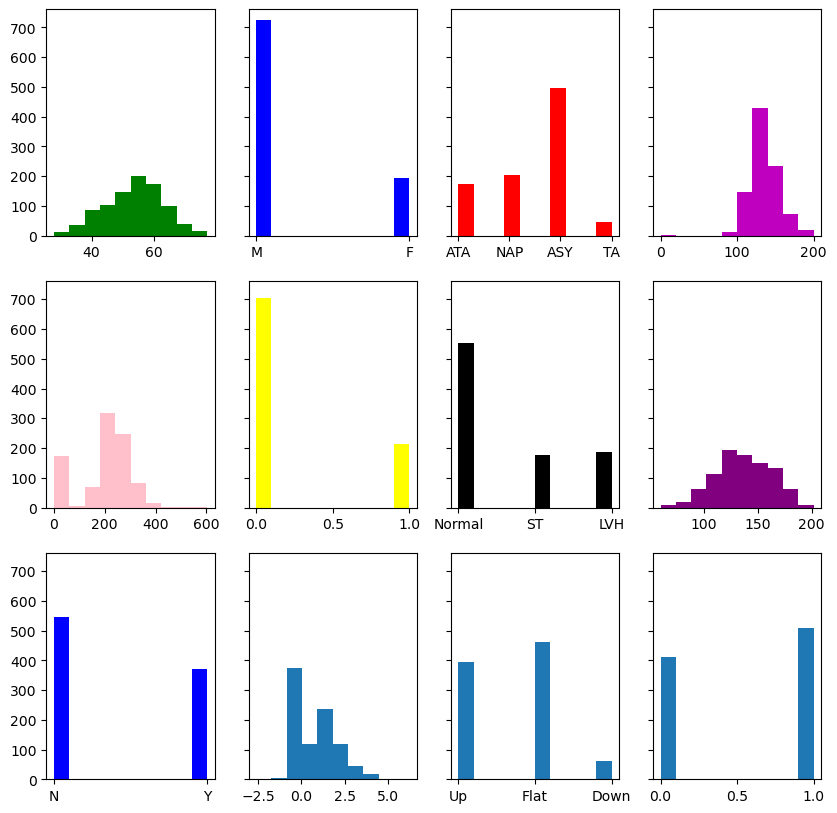

In [89]:
fig, axs = plt.subplots(3,4, figsize=(10, 10), sharey=True)
axs[0][0].hist(df['Age'],color='g')
axs[0][1].hist(df['Sex'],color='b')
axs[0][2].hist(df['ChestPainType'],color='r')
axs[0][3].hist(df['RestingBP'],color='m')
axs[1][0].hist(df['Cholesterol'],color='pink')
axs[1][1].hist(df['FastingBS'],color='yellow')
axs[1][2].hist(df['RestingECG'],color='black')
axs[1][3].hist(df['MaxHR'],color='purple')
axs[2][0].hist(df['ExerciseAngina'],color='blue')
axs[2][1].hist(df['Oldpeak'])
axs[2][2].hist(df['ST_Slope'])
axs[2][3].hist(df['HeartDisease'])


In [9]:
from scipy import stats


{'whiskers': [<matplotlib.lines.Line2D at 0x2083c2fc9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2083c2fcf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2083c2fc730>],
 'medians': [<matplotlib.lines.Line2D at 0x2083c2fd450>],
 'fliers': [<matplotlib.lines.Line2D at 0x2083c2fd6f0>],
 'means': []}

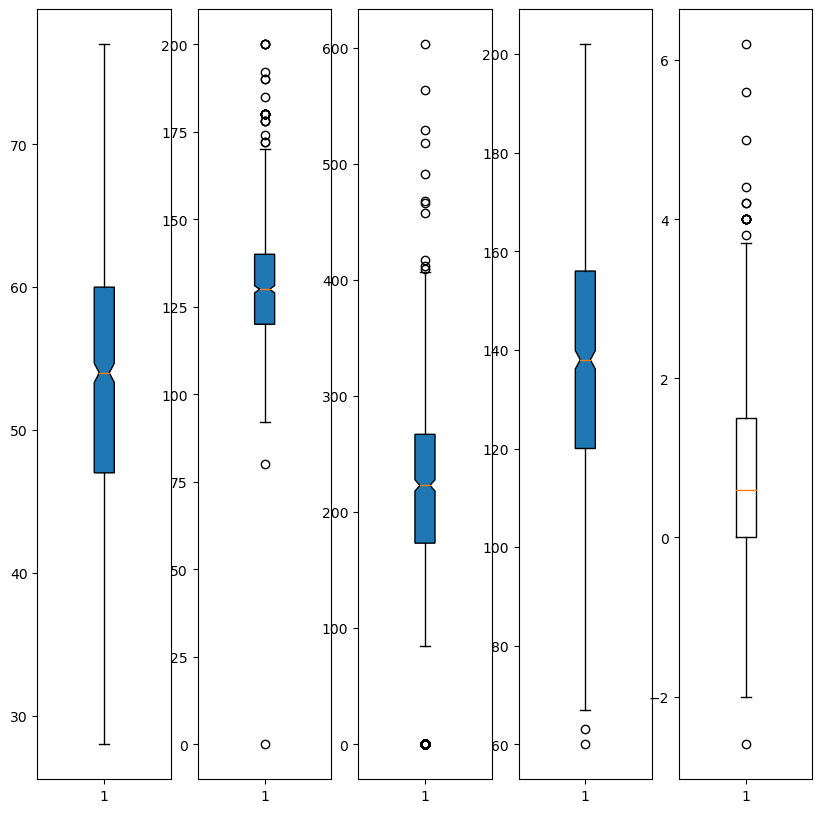

In [10]:
fig,axs=plt.subplots(1,5,figsize=(10,10))
axs[0].boxplot(df['Age'],patch_artist=True,notch=True)
axs[1].boxplot(df['RestingBP'],patch_artist=True,notch=True)
axs[2].boxplot(df['Cholesterol'],patch_artist=True,notch=True)
axs[3].boxplot(df['MaxHR'],patch_artist=True,notch=True)
axs[4].boxplot(df['Oldpeak'])

<h1> Outlier Detection by IQR method </h1>
<p><ul><li><p> IQR stands for interquartile Range and defined as the difference between third quartile and first quartile </p></li>
<ol><li>Any value which is falling in the fence of q1-1.5*(IQR) and 1.5*(IQR)+q3 are not considered as outliers.


# for the Age attribute let's define the iqr and findout what is the ceiling

In [11]:
age=list(df['Age'])
age.sort()


In [12]:
a1=len(age)/4
q1=age[int(a1)-1]
q1

47

In [13]:
q2=age[len(age)//2-1]
q2




54

In [14]:
q3=age[3*len(age)//4-1]
q3


60

In [15]:
q4=age[len(age)-1]
q4



77

<h1> Defining IQR </h1>

In [16]:
IQR=q3-q1
IQR

13

In [17]:
upper_ceiling=1.5*IQR+q3
lower_ceiling=q1-1.5*IQR

In [18]:
tol_level=(upper_ceiling,lower_ceiling)
tol_level

(79.5, 27.5)

#### Accessing the dataframe's age column and filtering the condition

In [87]:
df_1=pd.DataFrame(age)
df_1.rename(columns={0:'Age'},inplace=True)


In [86]:
## Outliers for the data is filtered out
df_1=(df_1[df_1['Age']>27.5] & df_1[df_1['Age']<79.5])



In [21]:
### For the RestingBP column again repeating the same process and trying to calculate different statstical measures

In [42]:
resting_bp=list(df['RestingBP'])
resting_bp.sort()


resting_bp[len(resting_bp)//4-1]

120

In [46]:
q2_resting_bp=resting_bp[len(resting_bp)//2-1]
q2_resting_bp


130

In [48]:
q3_resting_bp=resting_bp[3*len(resting_bp)//4-1]
q3_resting_bp

140

In [49]:
q4_resting_bp=resting_bp[len(resting_bp)-1]
q4_resting_bp

200

<h1> Defining again IQR for the resting BP column </h1>


In [52]:
IQR_=q3_resting_bp-q1_resting_bp
IQR_

20

In [56]:
upper_ceiling_=1.5*IQR_+q3_resting_bp
lower_ceiling_=-(1.5*IQR_ -q1_resting_bp)
tol_level_=(upper_ceiling_,lower_ceiling_)
tol_level_

(170.0, 90.0)

In [85]:
df2=pd.DataFrame(resting_bp)
df2=df2.rename(columns={0:'RestingBP'})




<h1> Before Building Model</h1>
<table><thead><th><td><h2>We have to understand few things here</h2></td></thead>
    <tbody><tr><td>The Categorical variables must be taken into account </td>
            <tr>   <td>The categorical variables can be transformed by encoding method for model implementation </td><tr>
    </tbody>    
</table>

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<div><p><h3> Name of the categorical variable </h3>
    <ol><li>Sex</li>
    <li>ChestPainType</li>
    <li>RestingECG</li>
    <li>ExcerciseAngina</li>
    <li>ST_Slope</li>
    </ol>
    </div>
    
 <div><h3> I am going to write a function of one hot encoding which will assign the values of the different <br>
    categorical variable into different values</h3>
    </div>
    
        

In [ ]:
def oh_encoder(col):
    